Learn From Tutorial of Code with Josh

https://www.youtube.com/watch?v=94PlBzgeq90

In [1]:
# keras to build and train neural networks
from tensorflow import keras

In [4]:
# StandardScaler to standarize numerical features by scaling them to have mean and variance
from sklearn.preprocessing import StandardScaler

In [5]:
# pip show scikit-learn

In [6]:
# pip install tensorflow

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
from datetime import datetime

In [13]:
import os

In [15]:
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [16]:
df = pd.read_csv('MicrosoftStock.csv')

In [17]:
df.head()

,index,date,open,high,low,close,volume,Name
0,390198,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,390199,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,390200,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,390201,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,390202,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1259 non-null   int64  
 1   date    1259 non-null   object 
 2   open    1259 non-null   float64
 3   high    1259 non-null   float64
 4   low     1259 non-null   float64
 5   close   1259 non-null   float64
 6   volume  1259 non-null   int64  
 7   Name    1259 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 78.8+ KB


In [19]:
df.describe()

,index,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,390827.000000,51.026394,51.436007,50.630397,51.063081,3.386946e+07
std,363.586303,14.859387,14.930144,14.774630,14.852117,1.958979e+07
min,390198.000000,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,390512.500000,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,390827.000000,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,391141.500000,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,391456.000000,95.140000,96.070000,93.720000,95.010000,2.483542e+08


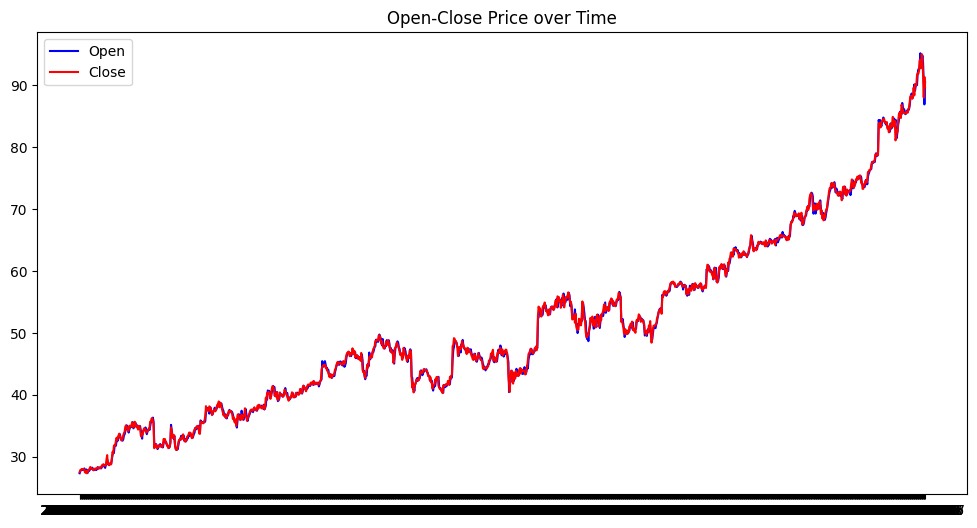

In [21]:
# Open and Close prices of time 
plt.figure(figsize=(12,6)) # how big the image want, 12 width, 6 height
plt.plot(df['date'], df['open'], label='Open', color='blue')
plt.plot(df['date'], df['close'], label='Close', color='red')
plt.title('Open-Close Price over Time')
plt.legend()
plt.show()

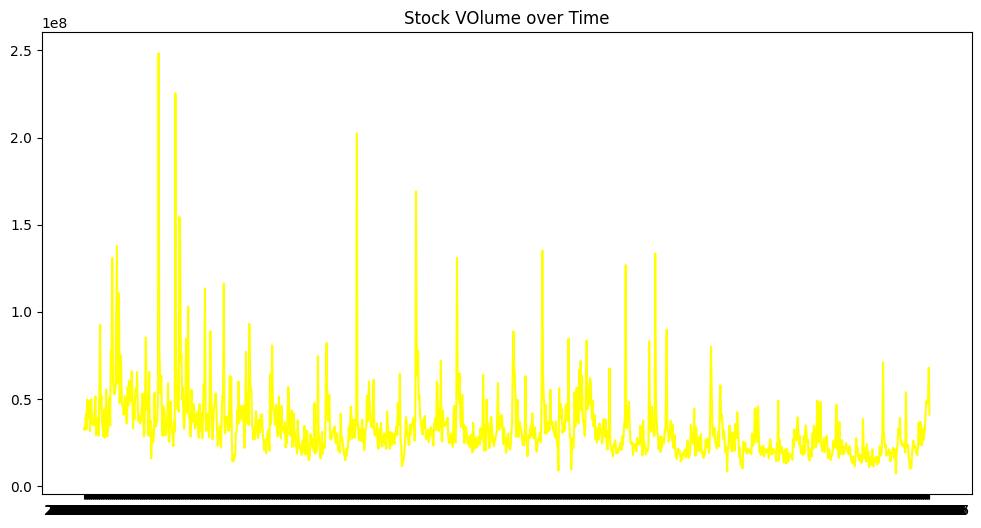

In [22]:
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['volume'], label='Volume', color='yellow')
plt.title('Stock VOlume over Time')
plt.show()

In [23]:
# drop non numeric data
numeric_data = df.select_dtypes(include=['int64','float64'])

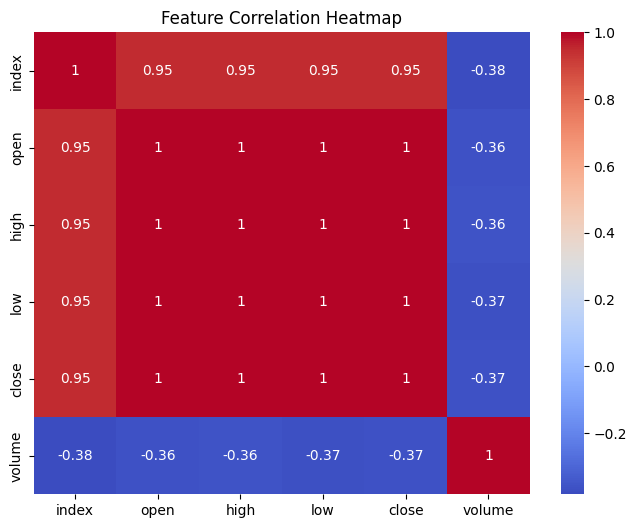

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [25]:
# converting date column to datetime to make date a filter
df['date']=pd.to_datetime(df['date'])

In [28]:
prediction = df.loc[
        (df['date']>datetime(2013,1,2)) & 
        (df['date']<datetime(2018,1,1))
        ]

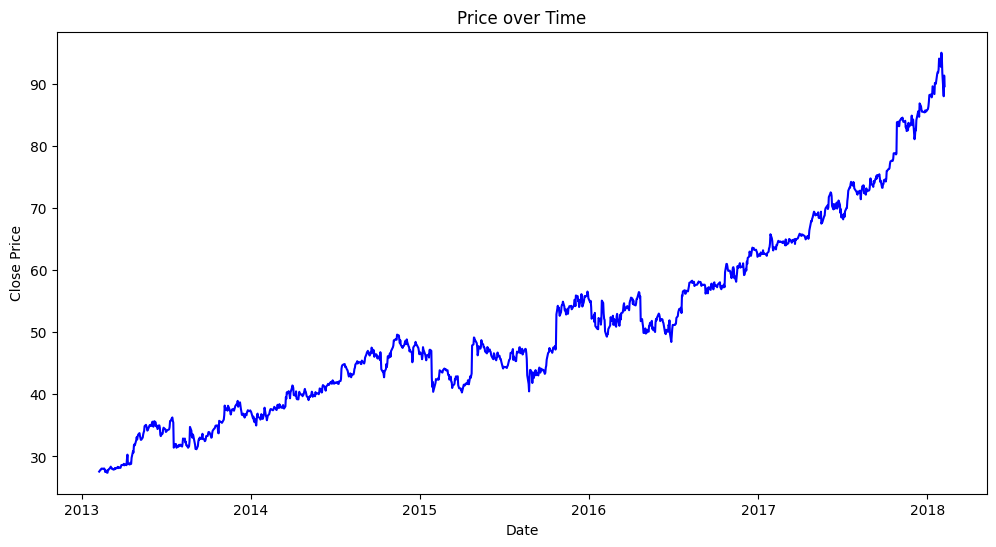

In [29]:
plt.figure(figsize=(12,6))
plt.plot(df['date'],df['close'],color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Price over Time')
plt.show()

In [34]:
# Predict (target value) is close price 
stock_close = df.filter(['close'])

In [35]:
dataset = stock_close.values # to convert into numpy arrays

In [36]:
training_data_len = int(np.ceil(len(dataset) * 0.95))

In [39]:
# giving mean and variance to the numpy array, scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

In [40]:
training_data = scaled_data[:training_data_len] # 95% of our data

In [41]:
X_train, y_train = [], []

In [42]:
# create a sliding window for 60 days 
for i in range (60, len(training_data)):
    X_train.append(training_data[i-60:i, 0])
    y_train.append(training_data[i,0])

In [46]:
# y_train

In [47]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [48]:
# converting to 3d array so that tensor can work
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

In [50]:
# X_train

In [112]:
# Set up the model, this is just an empty box like a container to hold the model, layers to be added here, unless that it is nothing
model = keras.models.Sequential()

Adding The Layers

In [113]:
# First layer let the model understand the pattern, it is like brain
model.add(keras.layers.LSTM(64  # number of memory cell, higher the number, more complex the model
                        , return_sequences=True  # after the mechanism done, return the ideas to send in next layer input
                        , input_shape=(X_train.shape[1],1)  # Tells the first lstm layer, what type of data to be expected
                        ))

In [114]:
# Second Layer, another brain of the model, only gives final idea, not a list of thoughts
model.add(keras.layers.LSTM(64
                            , return_sequences=False  # return single output, instead of a sequence
                            ))

In [115]:
# Dense Layer (Layer 3), turns complex patterns into decision, help model to adjust and redefine its understanding of data
model.add(keras.layers.Dense(128 # regular nn with 128 neurons (brain cell) to help final decision, go through and correlation between targets
                            , activation='relu' # help model introduce nonlinearity
                            ))

In [116]:
# dropout layer, reduce a portion of neurons randomly during training, to prevent over fitting (model memorizes data too well but struggles with new data)
model.add(keras.layers.Dropout(0.5))

In [117]:
# Final Dense Layer, to provide final prediction
model.add(keras.layers.Dense(1)) # 1 neurons to make the prediction one value

In [118]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

In [120]:
# model layers to compile together, stack one over another

# compilation tells how to learn, giving the info to improve
model.compile(optimizer='adam' # optimizer helps model to adjust its learning, adam is good for time series
                , loss='mae' # to check how far the predicted from the actual value
                , metrics=[keras.metrics.RootMeanSquaredError()])  # another metrics to check how accurate the predictions are

In [121]:
training = model.fit(X_train,y_train, epochs= 20, batch_size=32)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.3811 - root_mean_squared_error: 0.5135
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1380 - root_mean_squared_error: 0.1885
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.1252 - root_mean_squared_error: 0.1738
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.1262 - root_mean_squared_error: 0.1691
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1109 - root_mean_squared_error: 0.1512
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.1080 - root_mean_squared_error: 0.1472
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1114 - root_mean_squared_error: 0.1506
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.1105 - root_mean_squared_error: 0.1612
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.1107 - root_mean_squared_error: 0.1540
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1057 - root_mean_squared_error: 0.1430

In [84]:
test_data = scaled_data[training_data_len-60:]

In [85]:
X_test, y_test = [], dataset[training_data_len]

In [86]:
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i,0])

In [87]:
X_test = np.array(X_test)

In [67]:
# X_test

In [88]:
# X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1 ))

In [89]:
predictions = model.predict(X_test)
# predictions = scaler.inverse_transform(predictions)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


In [91]:
# predictions

In [92]:
# predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

In [94]:
# predictions

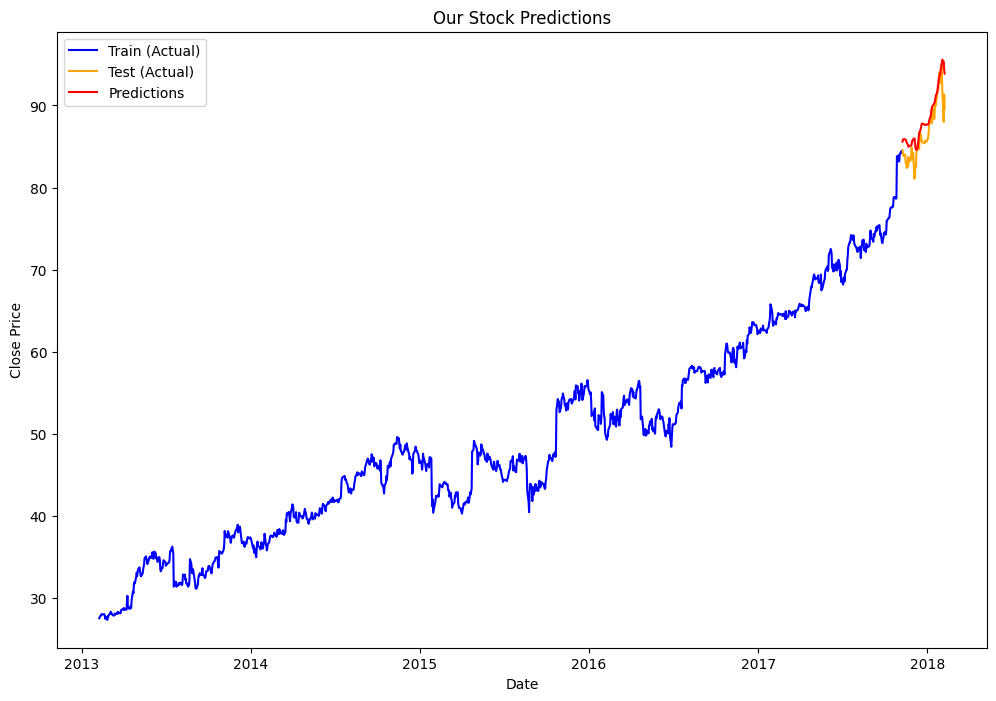

In [96]:
# Plotting data
train = df[:training_data_len]
test =  df[training_data_len:]

test = test.copy()

test['Predictions'] = predictions

plt.figure(figsize=(12,8))
plt.plot(train['date'], train['close'], label="Train (Actual)", color='blue')
plt.plot(test['date'], test['close'], label="Test (Actual)", color='orange')
plt.plot(test['date'], test['Predictions'], label="Predictions", color='red')
plt.title("Our Stock Predictions")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()